In [11]:
# ---------------------------------------------
# TASK 2: Quantitative Analysis using yfinance,
#         PyNance, and TA-Lib
# ---------------------------------------------

# Install dependencies (uncomment if running locally)
# !pip install yfinance talib-binary pynance pandas matplotlib

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pynance as pn
import talib as ta

plt.style.use("ggplot")

# ---------------------------------------------
# 1. Load and Prepare Stock Price Data
# ---------------------------------------------

# Choose any stock (example: Apple)
ticker = "AAPL"

# Download last 1 year of data
df = yf.download(ticker, period="1y")

# Show first rows
df.head()


C:\Users\PC\AppData\Local\Temp\ipykernel_15588\2169511676.py:26: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="1y")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-11-26,234.001678,234.509392,232.279472,232.279472,45986200
2024-11-27,233.872238,234.628826,232.757286,233.414318,33498400
2024-11-29,236.261459,236.739294,232.916587,233.752801,28481400
2024-12-02,238.511261,239.705855,236.092209,236.201715,48137100
2024-12-03,241.557495,241.667000,237.824379,238.730285,38861000


In [12]:
# ---------------------------------------------
# Clean Data & Check Columns
# ---------------------------------------------
df = df[["Open", "High", "Low", "Close", "Volume"]]
df.dropna(inplace=True)

df.tail()


Price,Open,High,Low,Close,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-11-20,270.829987,275.429993,265.920013,266.250000,45823600
2025-11-21,265.950012,273.329987,265.670013,271.489990,59030800
2025-11-24,270.899994,277.000000,270.899994,275.920013,65585800
2025-11-25,275.269989,280.380005,275.250000,276.970001,46914200
2025-11-26,276.959991,279.529999,276.630005,278.380005,18615568


📌 2. Technical Indicator Calculations (Using TA-Lib)

In [13]:
# Ensure Close column is float
df["Close"] = df["Close"].astype(float)

# Simple Moving Averages
df["SMA_20"] = df["Close"].rolling(window=20).mean()
df["SMA_50"] = df["Close"].rolling(window=50).mean()

# RSI 14
delta = df["Close"].diff()
up = delta.clip(lower=0)
down = -1*delta.clip(upper=0)
roll_up = up.rolling(14).mean()
roll_down = down.rolling(14).mean()
RS = roll_up / roll_down
df["RSI_14"] = 100 - (100 / (1 + RS))

# MACD
EMA_12 = df["Close"].ewm(span=12, adjust=False).mean()
EMA_26 = df["Close"].ewm(span=26, adjust=False).mean()
df["MACD"] = EMA_12 - EMA_26
df["MACD_SIGNAL"] = df["MACD"].ewm(span=9, adjust=False).mean()
df["MACD_HIST"] = df["MACD"] - df["MACD_SIGNAL"]

df.tail()


Price,Open,High,Low,Close,Volume,SMA_20,SMA_50,RSI_14,MACD,MACD_SIGNAL,MACD_HIST
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,
Date,,,,,,,,,,,
2025-11-20,270.829987,275.429993,265.920013,266.250000,45823600,269.496187,258.536149,41.371129,3.206074,4.493486,-1.287412
2025-11-21,265.950012,273.329987,265.670013,271.489990,59030800,269.942412,259.289082,55.138574,3.179848,4.230758,-1.050911
2025-11-24,270.899994,277.000000,270.899994,275.920013,65585800,270.310930,260.078067,60.332919,3.476455,4.079898,-0.603443
2025-11-25,275.269989,280.380005,275.250000,276.970001,46914200,270.722456,260.859080,61.561762,3.752981,4.014514,-0.261533
2025-11-26,276.959991,279.529999,276.630005,278.380005,18615568,271.169516,261.651509,63.988693,4.039342,4.019480,0.019862


4. Visualizations Price + Moving Averages

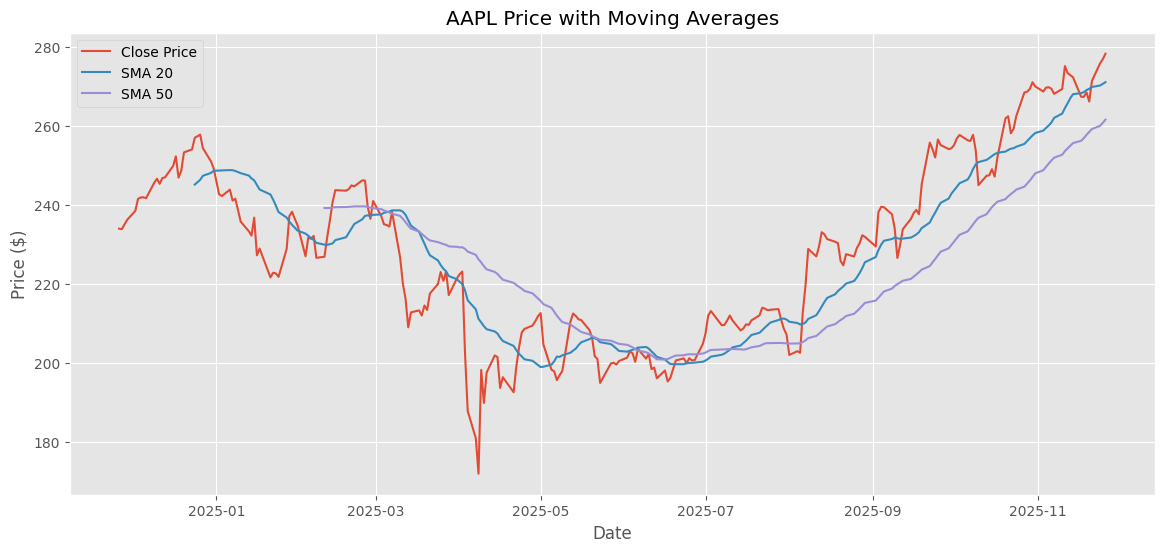

In [15]:
# ---------------------------------------------
# Plot: Closing Price + Moving Averages
# ---------------------------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

plt.plot(df["Close"], label="Close Price")
plt.plot(df["SMA_20"], label="SMA 20")
plt.plot(df["SMA_50"], label="SMA 50")

plt.title(f"{ticker} Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()


RSI Plot


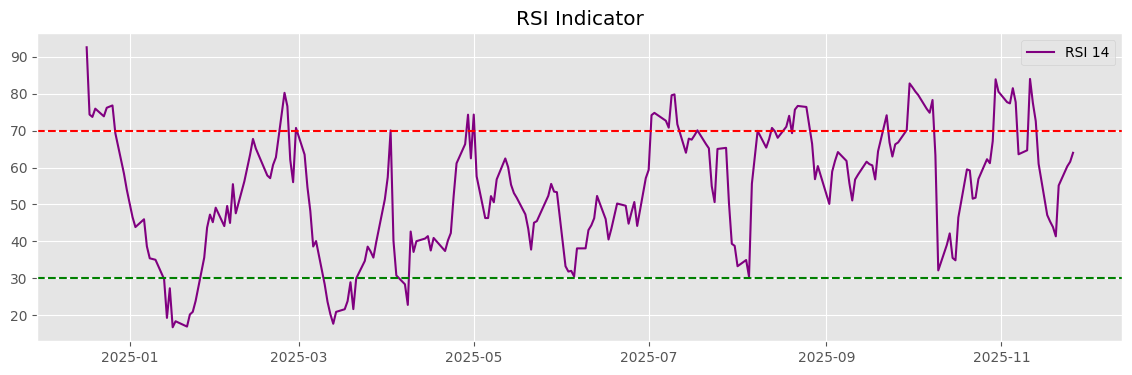

In [16]:
plt.figure(figsize=(14,4))
plt.plot(df["RSI_14"], label="RSI 14", color="purple")
plt.axhline(70, color="red", linestyle="--")
plt.axhline(30, color="green", linestyle="--")
plt.title("RSI Indicator")
plt.legend()
plt.show()


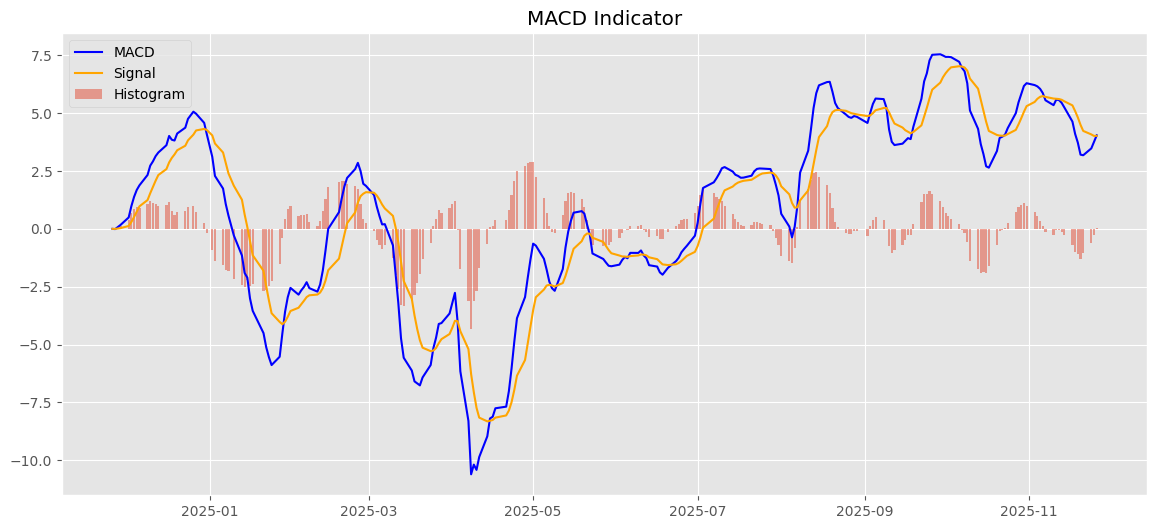

In [17]:
plt.figure(figsize=(14,6))

plt.plot(df["MACD"], label="MACD", color="blue")
plt.plot(df["MACD_SIGNAL"], label="Signal", color="orange")
plt.bar(df.index, df["MACD_HIST"], label="Histogram", alpha=0.5)

plt.title("MACD Indicator")
plt.legend()
plt.show()


Portfolio optimisation using PyNance

In [19]:
# ============================================
# PyNance – Basic portfolio optimisation demo
# ============================================

from pynance import portfolio_optimizer as po

TICKERS = ["AAPL", "MSFT", "META", "NVDA","TSLA"]

# Create the portfolio calculations object
portfolio = po.PortfolioCalculations(TICKERS)

print("=== Max Sharpe Portfolio (risk/return) ===")
print(portfolio.max_sharpe_portfolio("rr"))

print("\n=== Max Sharpe Portfolio weights ===")
print(portfolio.max_sharpe_portfolio("df").head())

print("\n=== Min Variance Portfolio (risk/return) ===")
print(portfolio.min_var_portfolio("rr"))

print("\n=== Min Variance Portfolio weights ===")
print(portfolio.min_var_portfolio("df").head())


c:\Week-1\venv\Lib\site-packages\pynance\datasources\data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adj_close_data[-1] == 0:
c:\Week-1\venv\Lib\site-packages\pynance\datasources\data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adj_close_data[-1] == 0:
c:\Week-1\venv\Lib\site-packages\pynance\datasources\data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adj_close_data

=== Max Sharpe Portfolio (risk/return) ===
                   Max Sharpe Portfolio
Expected Return                  79.49%
Standard Deviation               45.45%

=== Max Sharpe Portfolio weights ===
     Portfolio Weight
AAPL           14.94%
MSFT            0.00%
META            0.00%
NVDA           85.06%
TSLA            0.00%

=== Min Variance Portfolio (risk/return) ===
                   Min Var Portfolio
Expected Return               20.90%
Standard Deviation            20.19%

=== Min Variance Portfolio weights ===
     Portfolio Weight
AAPL           41.32%
MSFT           57.03%
META            1.65%
NVDA            0.00%
TSLA            0.00%


Volatility Plot

In [20]:
# Recalculate daily returns (SAFELY)
df["Daily_Return"] = df["Close"].pct_change()

# Calculate 30-day rolling volatility
df["Volatility_30"] = df["Daily_Return"].rolling(30).std()

df[["Daily_Return", "Volatility_30"]].tail()


Price,Daily_Return,Volatility_30
Ticker,,
Date,,
2025-11-20,-0.008601,0.013504
2025-11-21,0.019681,0.012039
2025-11-24,0.016317,0.012215
2025-11-25,0.003805,0.012200
2025-11-26,0.005091,0.012193


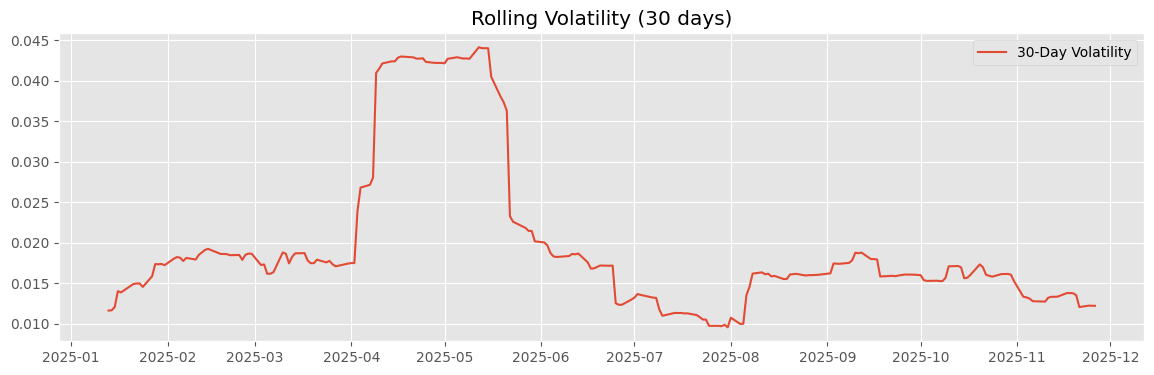

In [21]:
plt.figure(figsize=(14,4))
plt.plot(df["Volatility_30"], label="30-Day Volatility")
plt.title("Rolling Volatility (30 days)")
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

df["Daily_Return"] = df["Close"].pct_change()
stock = df.dropna()
plt.figure(figsize=(14,5))
plt.plot(stock['Daily_Return'], label='Daily Return')
plt.title('AAPL Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()
